In [41]:
# !pip install pydotplus
# !pip install pydot
# !pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [43]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


- 데이터: MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동작: 0~9 사이 숫자 판별

In [44]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

# [1] 데이터 로딩 및 준비

In [45]:
(x_train,y_train), (x_test, y_test) = load_data()

In [46]:
print(f'x_train.shape: {x_train.shape}, x_test.shape:{x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape:{y_test.shape}')

x_train.shape: (60000, 28, 28), x_test.shape:(10000, 28, 28)
y_train.shape: (60000,), y_test.shape:(10000,)


In [47]:
# 검증용 데이터셋 준비
x_train,x_val,y_train,y_val =train_test_split(x_train,y_train, stratify =y_train)

In [48]:
print(f'x_train.shape: {x_train.shape}, x_val.shape:{x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_val.shape:{y_test.shape}')

x_train.shape: (45000, 28, 28), x_val.shape:(10000, 28, 28)
y_train.shape: (45000,), y_val.shape:(10000,)


# [2] 데이터 전처리
---
    - 수치형 데이터 => 스케일링
    - 범주형 데이터 => 원핫인코딩

In [49]:
# 저장된 값 확인
x_train[0],y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [50]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0 ~ 1.0으로 스케일링
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [51]:
# 타켓 라벨 => OneHotEncoding으로 변환
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1,1))
y_val = encoder.fit_transform(y_val.reshape(-1,1))
y_test = encoder.fit_transform(y_test.reshape(-1,1))

In [53]:
type(y_train)

scipy.sparse.csr.csr_matrix

In [54]:
y_train = y_train.toarray()
y_val = y_val.toarray()
y_test = y_test.toarray()

In [55]:
print(f'y_train : {type(y_train)}\ny_train[0]: {y_train[0]}')

y_train : <class 'numpy.ndarray'>
y_train[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [56]:
# 데이터를 1차원으로 펴줘야 함 (45000,28,28) -> (45000,784)
x_train.shape

(45000, 28, 28)

In [57]:
x_train = x_train.reshape(-1,28*28)
x_val = x_val.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train.shape, y_train.shape

((45000, 784), (45000, 10))

# [3] 모델 생성
- (1) 모델 구성
- (2) 모델 생성

#### [3-1] 모델 구성
    - 입력 데이터 : 784 => 28*28 이미지 데이터
    - 출력 데이터 : 10  => 0 ~ 9 숫자 라벨
    - 학 습 방 법 : 분류 중에서 다중 분류

In [58]:
# 모델생성
model = Sequential(name = 'MINST_NNModel')

# 모델을 생성할 때, Sequential 안에 리스트로 여러 Dense를 삽입해서 모델 생성가능)

In [59]:
# flatten(): n차원 행렬 펴주기
model.add(Flatten(input_shape = (784,)))

In [60]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화함수, 
# [옵] input_shape param

model.add(Dense(250, activation = 'relu', input_shape=(784,)))

In [61]:
model.add(Dropout(0.3))

In [62]:
model.add(Dense(100, activation = 'relu'))

In [63]:
model.add(Dropout(0.3))

In [64]:
# 출력 Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화함수
model.add(Dense(10, activation ='softmax'))

In [65]:
model.summary()

Model: "MINST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 250)               196250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-t

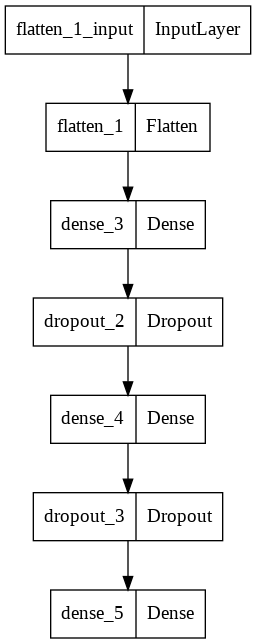

In [80]:
plot_model(model)

#### [3-2] 모델 생성
---
    - loss함수 => crossentropy
      - 이진분류 : binary_crossentropy
      - 다중분류 : sparse_categoriacl_crossentropy, categorical_crossentropy
    - optimizer기법 => 'rmsprop'
    - matrics 평가항목 => 'loss' 

In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

#### [4] 학습

In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [68]:
# EarlyStopping 생성 (callbacks)
stopCB = EarlyStopping(monitor = 'val_loss', patience = 2)

In [69]:
# fit 진행 중 모델의 값을 저장 (callbacks)
MODEL_PATH = './model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB = ModelCheckpoint(filepath = MODEL_PATH, save_best_only = True)


In [70]:
# 모델 훈련
his = model.fit(x_train,y_train, 
                epochs=6,
                validation_data = (x_val,y_val),
                callbacks=[modelCB,stopCB])
                

Epoch 1/6
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3476 - accuracy: 0.8938 - val_loss: 0.1432 - val_accuracy: 0.9573
Epoch 2/6
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1661 - accuracy: 0.9496 - val_loss: 0.1154 - val_accuracy: 0.9659
Epoch 3/6
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1312 - accuracy: 0.9610 - val_loss: 0.1022 - val_accuracy: 0.9693
Epoch 4/6
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1096 - accuracy: 0.9675 - val_loss: 0.0985 - val_accuracy: 0.9706
Epoch 5/6
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0956 - accuracy: 0.9704 - val_loss: 0.0888 - val_accuracy: 0.9735
Epoch 6/6
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0857 - accuracy: 0.9733 - val_loss: 0.0835 - val_accuracy: 0.9746


In [71]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt 

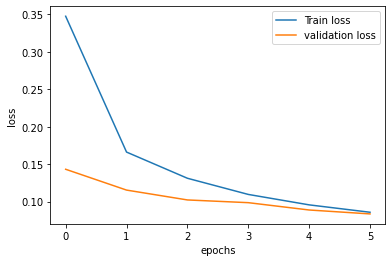

In [72]:
# loss 비교
plt.plot(his.epoch, his.history['loss'],label='Train loss')
plt.plot(his.epoch, his.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

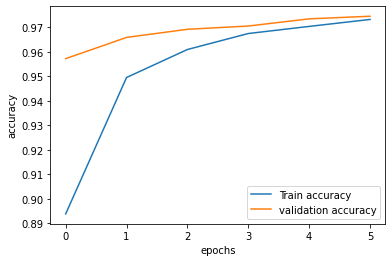

In [73]:
plt.plot(his.epoch, his.history['accuracy'],label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### [5] 평가
---
    [ evaluate() 메서드 ]
    - test data, target
    - 반환값: loss, metrics에서 지정한 성능평가항목

In [74]:
test_result = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9772


####[6] 테스트/예측

In [75]:
x_test[0].shape

(784,)

In [76]:
# model layer의 imput shape를 784로 생성했기 때문에 맞춰줘야함
model.predict(x_test[0].reshape(-1,784))

array([[9.06136222e-10, 3.54192707e-07, 8.52933517e-05, 2.28046320e-05,
        8.56959570e-09, 6.70641898e-09, 1.04160300e-12, 9.99884844e-01,
        1.03910935e-07, 6.61211516e-06]], dtype=float32)

In [77]:
pre_label = model.predict(x_test[0].reshape(-1,784))

In [78]:
import numpy as np
np.round(pre_label, 2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

####[7] 저장

In [79]:
# 모델 저장(가중치만 저장)
model.save_weights()

TypeError: ignored

???

pre_label = model.predict(x_test[0].reshape(-1,784)) -> 레이어인풋은(784,) 인데 왜?

  
    
modelCB = ModelCheckpoint(filepath = MODEL_PATH, save_best_only = True)
-> save_best_only 인데 왜 에포크마다 저장됨?
